In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': int, 'usosmultiples': int, 'piscina': int, 'escuelascercanas': int,
        'centroscomercialescercanos': int, 'precio':int}

non_numerical_types = ['titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad', 'provincia', 'lat', 'lng','idzona']

pd.set_option('display.max_columns', 30)

training_data = pd.read_csv('../../data/TP2/train.csv', dtype = types)
test_data = pd.read_csv('../../data/TP2/test.csv', dtype = types)


training_data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,2015-08-23 00:00:00,0,0,0,0,0,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,0,0,0,1,1,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,2015-10-17 00:00:00,0,0,0,0,0,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,19.301889,-99.688019,2012-03-09 00:00:00,0,0,0,1,1,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,NaN,2016-06-07 00:00:00,0,0,0,0,0,1150000


In [46]:
training_data['fecha'] = (pd.to_datetime(training_data['fecha']) - pd.datetime(1970,1,1)).apply(lambda x: x.days)/1000
test_data['fecha'] = (pd.to_datetime(test_data['fecha']) - pd.datetime(1970,1,1)).apply(lambda x: x.days)/1000

training_data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,16.670,0,0,0,0,0,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.310204,-99.227654,15.884,0,0,0,1,1,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,16.725,0,0,0,0,0,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,19.301889,-99.688019,15.408,0,0,0,1,1,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,NaN,16.959,0,0,0,0,0,1150000


In [49]:
#training_data = training_data.drop(columns=non_numerical_types)
#test_data = test_data.drop(columns=non_numerical_types)
#training_data.head()

# Matriz de correlacion

# notar que los atributos mas correlacionados a precio son metroscubiertos, banios, metrostotales, garages y habitaciones (en ese orden)

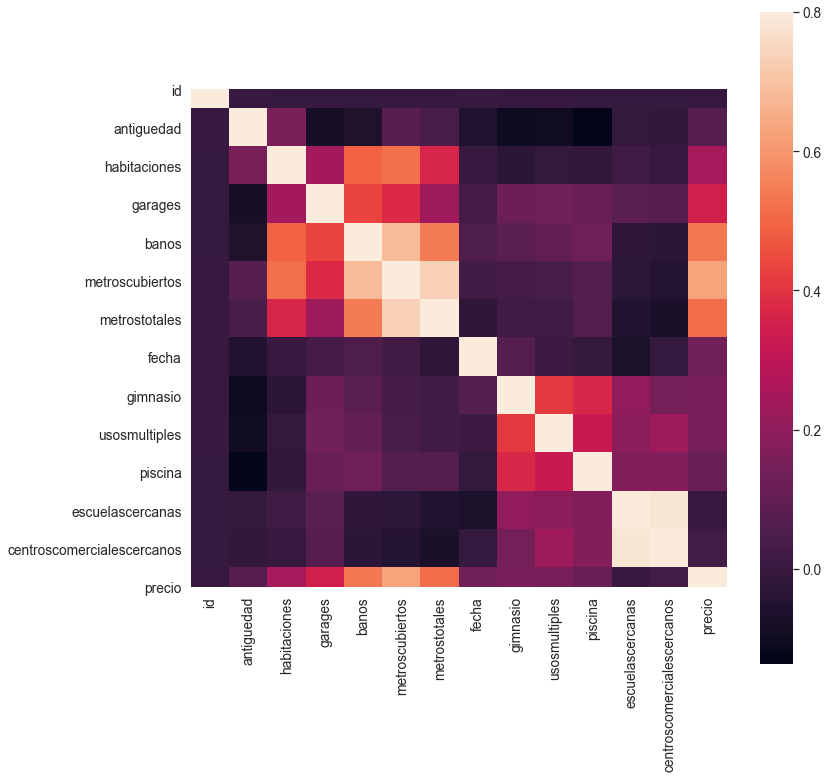

In [50]:
corrmat = training_data.drop(columns=non_numerical_types).corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

/home/mati/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


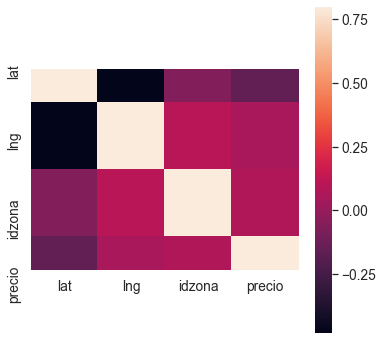

In [59]:
a = training_data[non_numerical_types]
a['precio'] = training_data['precio']
corrmat_cat = a.corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat_cat, vmax=.8, square=True);

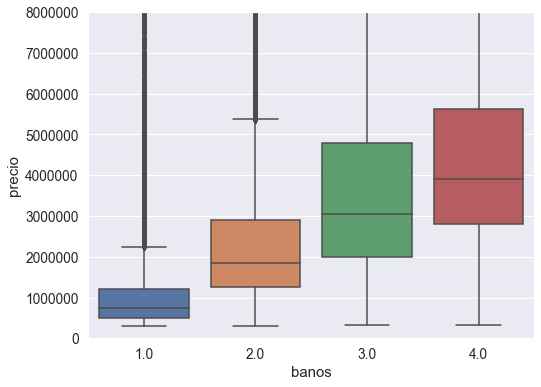

In [26]:
var = 'banos'
data = pd.concat([training_data['precio'], training_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="precio", data=data)
fig.axis(ymin=0, ymax=8000000);

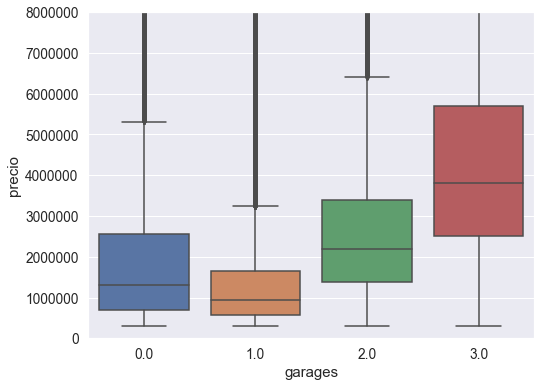

In [27]:
var = 'garages'
data = pd.concat([training_data['precio'], training_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="precio", data=data)
fig.axis(ymin=0, ymax=8000000);

interesante que tener 0 garages te sube el precio promedio

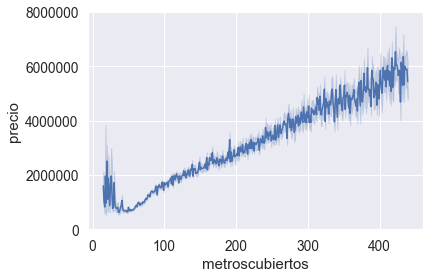

In [38]:
var = 'metroscubiertos'
data = pd.concat([training_data['precio'], training_data[var]], axis=1)
fig = sns.lineplot(x=var, y="precio", data=data)
fig.axis(ymin=0, ymax=8000000);

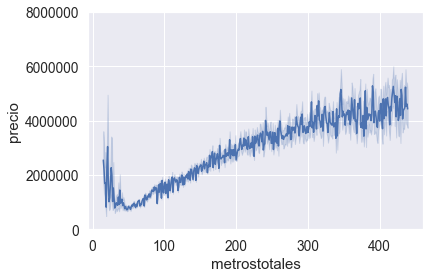

In [36]:
var = 'metrostotales'
data = pd.concat([training_data['precio'], training_data[var]], axis=1)
fig = sns.lineplot(x=var, y="precio", data=data)
fig.axis(ymin=0, ymax=8000000);

In [4]:
training_data.to_csv('../../res/ftr/training_data.csv')
test_data.to_csv('../../res/ftr/test_data.csv')